<a href="https://colab.research.google.com/github/oumaima61/my-machine-learning-projects/blob/master/Machine_Learning_with_Scikit_Learn_Hyperparameters_and_Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Holdout Sets and Cross-Validation

In an earlier notebook, we saw the basic recipe for applying a supervised machine learning model:

    Choose a class of model.
    Choose model hyperparameters.
    Fit the model to the training data.
    Use the model to predict labels for new data.

This lesson dives into the first two steps in more detail: choosing a model and its hyperparameters.



### Thinking about Model Validation

In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

The following sections first show a naive approach to model validation and why it fails, before exploring the use of holdout sets and cross-validation for more robust model evaluation.




### model Validation, The Wrong Way

Let's demonstrate the naive approach to validation using the Iris data, which we saw in a previous notebook. We will start by loading the data:


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Next, we choose a model and hyperparameters. Here we'll use a k-neighbors classifier with n_neighbors=1. This is a very simple and intuitive model that says "the label of an unknown point is the same as the label of its closest training point."

As we saw before, we can fit and predict in four steps:


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X) 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model) 

1.0

Model Validation, The Right Way: Holdout Sets

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5, test_size=0.5)
X1.shape, X2.shape

((75, 4), (75, 4))

In [ ]:
# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [ ]:
y2_model = model.fit(X1, y1).predict(X2)
score2 = accuracy_score(y2, y2_model)

y1_model = model.fit(X2, y2).predict(X1)
score1 = accuracy_score(y1, y1_model)

print(score1, score2)

0.96 0.9066666666666666


In [ ]:
np.mean([score1, score2])

0.9333333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [ ]:
scores.mean() 

0.96

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
scores.mean() 

0.96

#Selecting the Best Model

This sort of validation approach can quantitatively answer a question we've hinted at a few times now: which model is the "best" model to use on a given data set? The strategy is to use cross-validation to give each model an overall effectiveness score, and then to choose the model that maximizes that.

Here is an example, using the digits dataset that we have seen previously.

We'll compare Gaussian Naive Bayes, random forests, LinearSVC, and logistic regression:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

for Model in [GaussianNB, RandomForestClassifier, LinearSVC, LogisticRegression]:
    scores = cross_val_score(Model(), digits.data, digits.target, cv=10)
    print(Model.__name__, scores.mean().round(2), "+/-", scores.std().round(2))

GaussianNB 0.81 +/- 0.06
RandomForestClassifier 0.95 +/- 0.02


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

LinearSVC 0.91 +/- 0.04


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression 0.93 +/- 0.03


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Similarly, for any given model, we can explore the effect of the hyperparameters (for example, the random forest max_depth and n_estimators parameters):

In [ ]:
for max_depth in [2, 4, 8, 16]:
    for n_estimators in [10, 50, 100]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        scores = cross_val_score(model, digits.data, digits.target, cv=10)
        print("depth =", max_depth,
              "n_est =", n_estimators,
              scores.mean(), "+/-", scores.std())

depth = 2 n_est = 10 0.6683364369956548 +/- 0.058699295292606056
depth = 2 n_est = 50 0.7985381750465549 +/- 0.049863053748009686
depth = 2 n_est = 100 0.7979950341402855 +/- 0.05060478576744298
depth = 4 n_est = 10 0.8247082557417753 +/- 0.07428124065903462
depth = 4 n_est = 50 0.8797889509621355 +/- 0.04122677924435108
depth = 4 n_est = 100 0.8892582247051521 +/- 0.04941951183978975
depth = 8 n_est = 10 0.9053972687771571 +/- 0.03919676682885731
depth = 8 n_est = 50 0.9393171942892613 +/- 0.028569604640281777
depth = 8 n_est = 100 0.9421135940409684 +/- 0.02406164912728482
depth = 16 n_est = 10 0.9154065797641217 +/- 0.035176792097806726
depth = 16 n_est = 50 0.9465549348230912 +/- 0.024457103289293125
depth = 16 n_est = 100 0.951576660459342 +/- 0.016902157468294036


Doing this by hand becomes a bit tedious, particularly when you want to vary multiple parameters.

To automate this, scikit-learn includes the GridSearch module (which will automatically compute all of these combinations) and gives an API for selecting the best result:

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(RandomForestClassifier(), cv=5,
                    param_grid = {'max_depth': [2, 4, 8, 16],
                                  'n_estimators': [10, 50, 100]})
grid.fit(digits.data, digits.target)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid.best_params_

{'max_depth': 16, 'n_estimators': 100}

In [ ]:
grid.best_score_

0.9360306406685236

##Bias, Variance, and Learning Curves

Now that we've seen the basics of validation and cross-validation, we will go into a little more depth regarding model selection and selection of hyperparameters. These issues are some of the most important aspects of the practice of machine learning, and I find that this information is often glossed over in introductory machine learning tutorials.

Of core importance is the following question: if our estimator is underperforming, how should we move forward? There are several possible answers:

    Use a more complicated/more flexible model.
    Use a less complicated/less flexible model.
    Gather more training samples.
    Gather more data to add features to each sample.

The answer to this question is often counterintuitive. In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results! The ability to determine which steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.
## The Bias-Variance Tradeoff 

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between bias and variance. Consider the following figure, which presents two regression fits to the same dataset:

It is clear that neither of these models is a particularly good fit to the data, but they fail in different ways.

The model on the left attempts to find a straight-line fit through the data. Because the data is intrinsically more complicated than a straight line, the straight-line model will never be able to describe this dataset well. Such a model is said to underfit the data: that is, it does not have enough model flexibility to suitably account for all the features in the data; another way of saying this is that the model has high bias.

The model on the right attempts to fit a high-order polynomial through the data. Here the model fit has enough flexibility to nearly perfectly account for the fine features in the data, but even though it very accurately describes the training data, its precise form seems to be more reflective of the particular noise properties of the data rather than the intrinsic properties of whatever process generated that data. Such a model is said to overfit the data; that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution. Another way of saying this is that the model has high variance.

To look at this in another light, consider what happens if we use these two models to predict the y-value for some new data. In the following diagrams, the red/lighter points indicate data that is omitted from the training set:

The score here is the R2 score, or coefficient of determination, which measures how well a model performs relative to a simple mean of the target values. R2=1 indicates a perfect match, R2=0 indicates the model does no better than simply taking the mean of the data, and negative values mean even worse models. From the scores associated with these two models, we can make an observation that holds more generally:

    For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
    For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

If we imagine that we have some ability to tune the model complexity, we would expect the training score and validation score to behave as illustrated in the following figure:

The diagram shown here is often called a validation curve, and we see the following essential features:

    The training score : is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
    For very low model complexity (a high-bias model), the training data is underfit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
    For very high model complexity (a high-variance model), the training data is overfit, which means that the model predicts the training data very well, but fails for any previously unseen data.
    For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable tradeoff between bias and variance.

The means of tuning the model complexity varies from model to model; when we discuss individual models in depth in later sections, we will see how each model allows for such tuning.
## Validation Curves in Scikit-Learn

Let's look at an example of using cross-validation to compute the validation curve for a class of models. Here we will use a polynomial regression model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter. For example, a degree-1 polynomial fits a straight line to the data; for model parameters a and b:

y=ax+b
y=ax+b

A degree-3 polynomial fits a cubic curve to the data; for model parameters a, b, c, d:

y=ax3+bx2+cx+d
y=ax3+bx2+cx+d

We can generalize this to any number of polynomial features. In scikit-learn, we can implement this with a simple linear regression combined with the polynomial preprocessor. We will use a pipeline to string these operations together (we will discuss polynomial features and pipelines more fully in Machine Learning with Scikit-Learn: Feature Engineering.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [ ]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

We can now visualize our data, along with polynomial fits of several degrees:

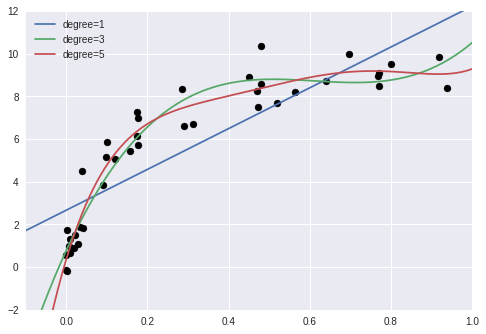

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn') # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

The knob controlling model complexity in this case is the degree of the polynomial, which can be any non-negative integer. A useful question to answer is this: what degree of polynomial provides a suitable trade-off between bias (underfitting) and variance (overfitting)?

We can make progress in this by visualizing the validation curve for this particular data and model; this can be done in a straightforward manner using the validation_curve convenience routine provided by scikit-learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:


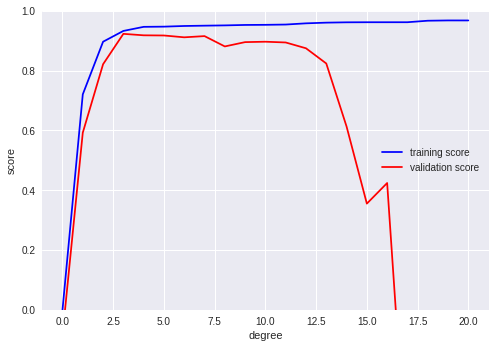

In [ ]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

This shows precisely the qualitative behavior we expect—the training score is everywhere higher than the validation score; the training score is monotonically improving with increased model complexity; and the validation score reaches a maximum before dropping off as the model becomes overfit.

From the validation curve, we can see that the optimal tradeoff between bias and variance is found for a third-order polynomial; we can compute and display this fit over the original data as follows:


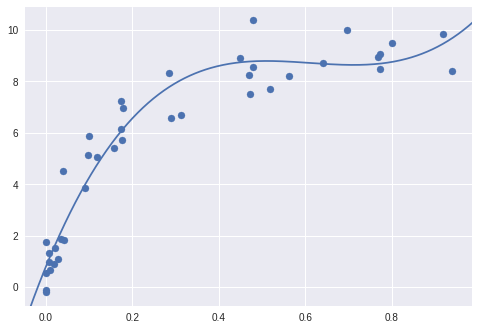

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Notice that finding this optimal model did not actually require us to compute the training score, but examining the relationship between the training score and validation score can give us useful insight into the performance of the model.

Learning Curves : 

One important aspect of model complexity is that the optimal model will generally depend on the size of your training data. For example, let's generate a new dataset with a factor of five more points:


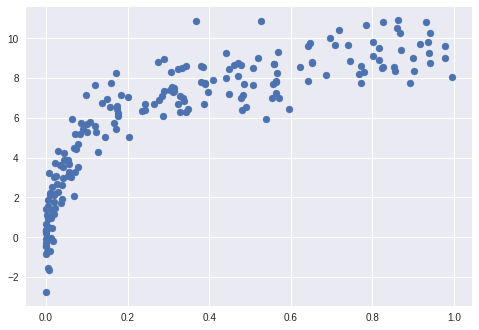

In [ ]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

We will duplicate the preceding code to plot the validation curve for this larger dataset. For reference, let's overplot the previous results as well:

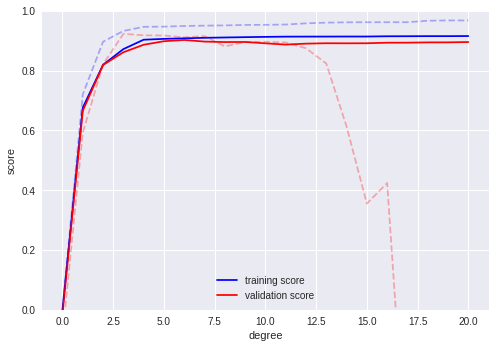

In [ ]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

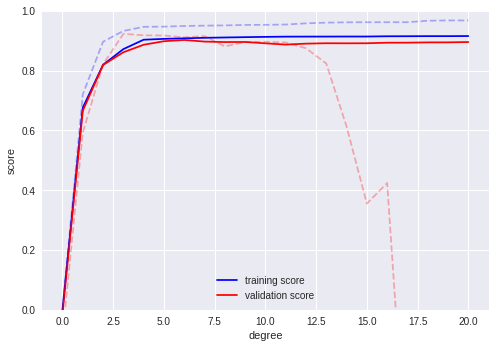

In [ ]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset. It is clear from the validation curve that the larger dataset can support a much more complicated model: the peak here is probably around a degree of 6, but even a degree-20 model is not seriously overfitting the data—the validation and training scores remain very close.

Thus we see that the behavior of the validation curve has not one but two important inputs: the model complexity and the number of training points. It is often useful to explore the behavior of the model as a function of the number of training points, which we can do by using increasingly larger subsets of the data to fit our model. A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

The general behavior we would expect from a learning curve is this:

    A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
    A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
    A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

With these features in mind, we would expect a learning curve to look qualitatively like the following figure:


The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.

## Learning Curves in Scikit-Learn

Scikit-learn offers a convenient utility for computing such learning curves from your models. Here, we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth-order polynomial:


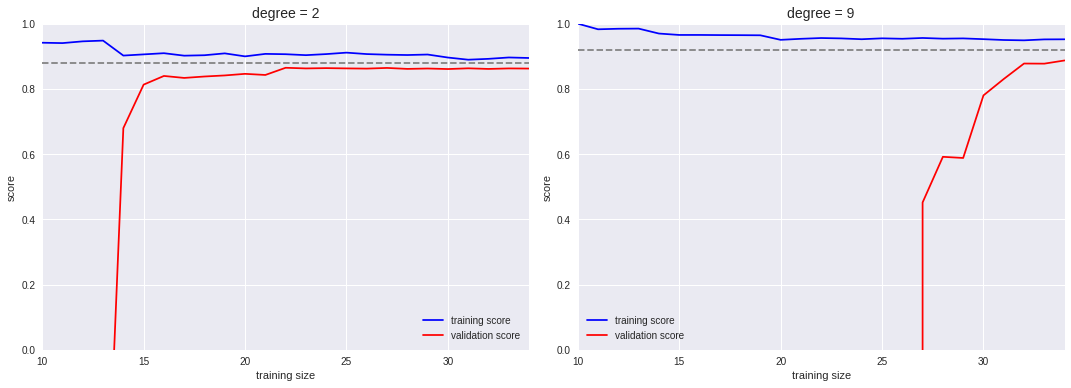

In [ ]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best') 

This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing training data. In particular, when your learning curve has already converged (i.e., when the training and validation curves are already close to each other) adding more training data will not significantly improve the fit! This situation is seen in the left panel, with the learning curve for the degree-2 model.

The only way to increase the converged score is to use a different (usually more complicated) model. We see this in the right panel: by moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance (indicated by the difference between the training and validation scores). If we were to add even more data points, the learning curve for the more complicated model would eventually converge.

Plotting a learning curve for your particular choice of model and dataset can help you to make this type of decision about how to move forward in improving your analysis.


## Returning to Grid Search

The preceding discussion is meant to give you some intuition into the tradeoff between bias and variance, and its dependence on model complexity and training set size. In practice, models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to multidimensional surfaces. In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

Above we saw an example of this using a grid search with cross-validation—let's look at doing this with our polynomial model:


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

Notice that like a normal estimator, this has not yet been applied to any data. Calling the fit() method will fit the model at each grid point, keeping track of the scores along the way :

In [ ]:
grid.fit(X, y); 

Now that this is fit, we can ask for the best parameters as follows :

In [ ]:
grid.best_params_ 

Finally, if we wish, we can use the best model and show the fit to our data using code from before : 

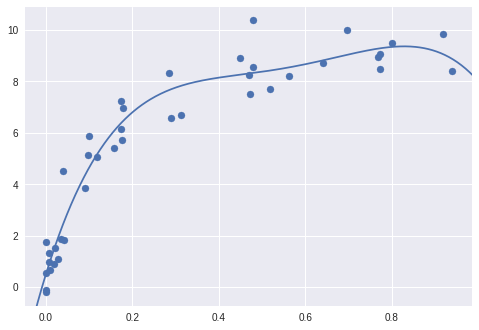

In [ ]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim); 

The grid search provides many more options, including the ability to specify a custom scoring function, to parallelize the computations, to do randomized searches, and more. More examples of this can be seen in the Python Data Science Handbook, or in scikit-learn's grid search documentation.
###  Summary

**In this notebook, we began to explore the concept of model validation and hyperparameter optimization, focusing on intuitive aspects of the bias–variance tradeoff and how it comes into play when fitting models to data. In particular, we found that the use of a validation set or cross-validation approach is vital when tuning parameters in order to avoid overfitting for more complex/flexible models.**
